In [1]:
import practicalSPARQL
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [2]:
root_q = 'queries'
root_d = 'results'

# read login data
login = pd.read_json('config_sparql.json')
ENDPOINT = login['endpoint'][0]
USERNAME = login['username'][0]
PASSWORD = login['password'][0]

# create sparql object
sparql = practicalSPARQL.practicalWrapper(ENDPOINT)
sparql.setCredentials(USERNAME, PASSWORD)

print("--- Querying ENDPOINT: {} ---".format(ENDPOINT))

--- Querying ENDPOINT: http://devmeta.sphaera.mpiwg-berlin.mpg.de/sparql ---


In [3]:
q = practicalSPARQL.stringify_SPARQL('elements_query_050824.sparql')    # select data from the ttl file as a dataframe
df = sparql.select_as_dataframe(q)

In [4]:
q = practicalSPARQL.stringify_SPARQL('books_query.sparql')    # select data from the ttl file as a dataframe
books = sparql.select_as_dataframe(q)

In [5]:
# Define the list of keywords you want to filter by
keywords = [
    'CK_Pyramid of a Sign', 
    'CK_Sign as Spherical Wedge', 
    'CK_Sphere Sliced by the Signs', 
    'CK_Sun in Sign', 
    'CK_Rectangular Shape of the Sign', 
    'CK_Symbols of Signs',
  #  'CK_Zodiac'
]

# Create a regex pattern from the keywords
pattern = '|'.join(keywords)

# Filter the DataFrame
being_in_a_sign = df[df['cks'].str.contains(pattern, na=False)]

In [6]:
being_in_a_sign

,images,cluster_name,cks,book,bid,part_or_adaption,part_or_adaption_label,type_label,custom_identifier,place,year,flag
37,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01310,CK_Sphere Sliced by the Signs,http://sphaera.mpiwg-berlin.mpg.de/id/item/91f...,1925,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Annotated, Content",322,Venice,1490,nan
85,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_02197,CK_Sphere Sliced by the Signs,http://sphaera.mpiwg-berlin.mpg.de/id/item/0a7...,1624,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Tractatus de sphaera,"Annotated, Content",231,Paris,1494,nan
86,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_02230,CK_Sphere Sliced by the Signs,http://sphaera.mpiwg-berlin.mpg.de/id/item/0a7...,1624,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Tractatus de sphaera,"Annotated, Content",231,Paris,1494,nan
87,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00354,CK_Pyramid of a Sign,http://sphaera.mpiwg-berlin.mpg.de/id/item/0a7...,1624,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Tractatus de sphaera,"Annotated, Content",231,Paris,1494,nan
109,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00142,"CK_Pyramid of a Sign, CK_Sign as Spherical Wedge",http://sphaera.mpiwg-berlin.mpg.de/id/item/91f...,1925,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Content, Annotated",322,Venice,1490,nan
...,...,...,...,...,...,...,...,...,...,...,...,...
20541,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00028,"CK_Pyramid of a Sign, CK_Sun in Sign",http://sphaera.mpiwg-berlin.mpg.de/id/item/ce1...,2189,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Burgersdijck's commentary on the Sphere,"Content, Annotated",266,Leiden,1626,nan
20542,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00223,"CK_Sign as Spherical Wedge, CK_Sphere Sliced b...",http://sphaera.mpiwg-berlin.mpg.de/id/item/ce1...,2189,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Burgersdijck's commentary on the Sphere,"Content, Annotated",266,Leiden,1626,nan
20632,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00555,"CK_Sign as Spherical Wedge, CK_Sphere Sliced b...",http://sphaera.mpiwg-berlin.mpg.de/id/item/f38...,1967,http://sphaera.mpiwg-berlin.mpg.de/id/part/47c...,Compendium by P. Valeriano,"Original Part, Content",251,Lyon,1606,nan
20682,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01153,"CK_Pyramid of a Sign, CK_Sign as Spherical Wed...",http://sphaera.mpiwg-berlin.mpg.de/id/item/f38...,1967,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Vinet 1584 - Commentary on Treatise on the Sph...,"Annotated, Content",939,Lyon,1606,nan


C:\Users\nogas\AppData\Local\Temp\ipykernel_19136\31550167.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_books = df.groupby('interval')['book'].nunique()
C:\Users\nogas\AppData\Local\Temp\ipykernel_19136\31550167.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_keywords = df.groupby('interval').agg({'num_keywords': 'mean'})


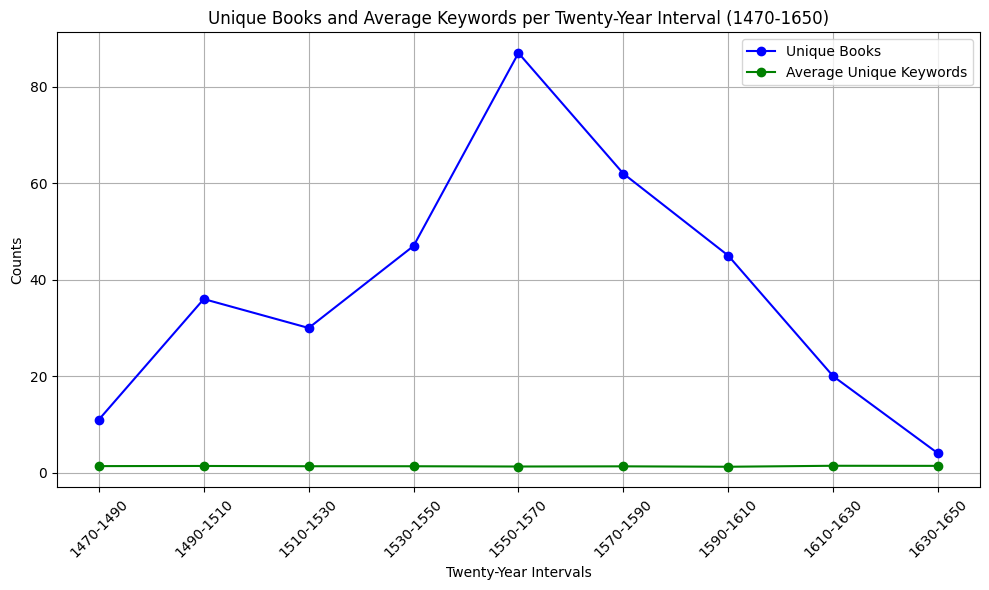

In [8]:
# Convert the year to an integer (if it's not already)
df['year'] = df['year'].astype(int)

# Create twenty-year intervals
bins = list(range(1470, 1660, 20))
labels = [f"{i}-{i + 20}" for i in bins[:-1]]
df['interval'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)

# Count unique books per interval
unique_books = df.groupby('interval')['book'].nunique()

# Calculate unique keywords per book
df['num_keywords'] = df['cks'].apply(lambda x: len(set(x.split(','))))
avg_keywords = df.groupby('interval').agg({'num_keywords': 'mean'})

# Combine results into a single DataFrame for plotting
result = pd.DataFrame({
    'Unique Books': unique_books,
    'Avg Unique Keywords': avg_keywords['num_keywords']
})

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(result.index, result['Unique Books'], marker='o', label='Unique Books', color='b')
plt.plot(result.index, result['Avg Unique Keywords'], marker='o', label='Average Unique Keywords', color='g')
plt.title('Unique Books and Average Keywords per Twenty-Year Interval (1470-1650)')
plt.xlabel('Twenty-Year Intervals')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_19136\3269099221.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_books = df.groupby('interval')['book'].nunique()
C:\Users\nogas\AppData\Local\Temp\ipykernel_19136\3269099221.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_keywords = df.groupby('interval').agg({'num_keywords': 'mean'})


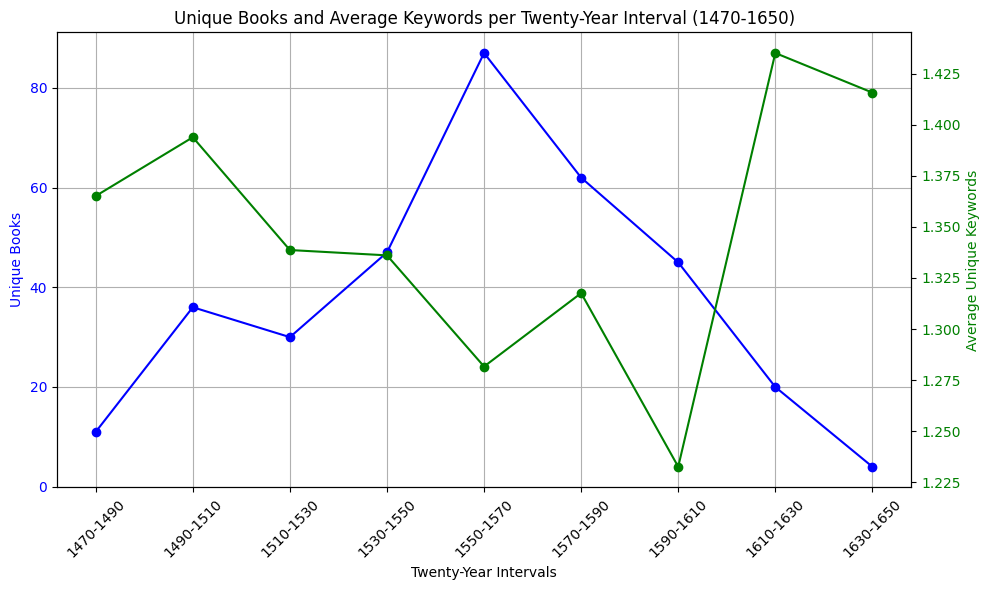

In [9]:

# Convert the year to an integer (if it's not already)
df['year'] = df['year'].astype(int)

# Create twenty-year intervals
bins = list(range(1470, 1660, 20))
labels = [f"{i}-{i + 20}" for i in bins[:-1]]
df['interval'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)

# Count unique books per interval
unique_books = df.groupby('interval')['book'].nunique()

# Calculate unique keywords per book
df['num_keywords'] = df['cks'].apply(lambda x: len(set(x.split(','))))
avg_keywords = df.groupby('interval').agg({'num_keywords': 'mean'})

# Combine results into a single DataFrame for plotting
result = pd.DataFrame({
    'Unique Books': unique_books,
    'Avg Unique Keywords': avg_keywords['num_keywords']
})

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Unique Books on primary y-axis
ax1.plot(result.index, result['Unique Books'], marker='o', label='Unique Books', color='b')
ax1.set_xlabel('Twenty-Year Intervals')
ax1.set_ylabel('Unique Books', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create secondary y-axis for Avg Unique Keywords
ax2 = ax1.twinx()
ax2.plot(result.index, result['Avg Unique Keywords'], marker='o', label='Average Unique Keywords', color='g')
ax2.set_ylabel('Average Unique Keywords', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Title and layout
plt.title('Unique Books and Average Keywords per Twenty-Year Interval (1470-1650)')
ax1.set_xticks(result.index)
ax1.set_xticklabels(result.index, rotation=45)
ax1.grid()
fig.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_19136\566767670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  being_in_a_sign['year'] = being_in_a_sign['year'].astype(int)
C:\Users\nogas\AppData\Local\Temp\ipykernel_19136\566767670.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  being_in_a_sign['interval'] = pd.cut(being_in_a_sign['year'], bins=bins, labels=labels, right=False)
C:\Users\nogas\AppData\Local\Temp\ipykernel_19136\566767670.py:10: FutureWarning: The default of observed=False is deprecated

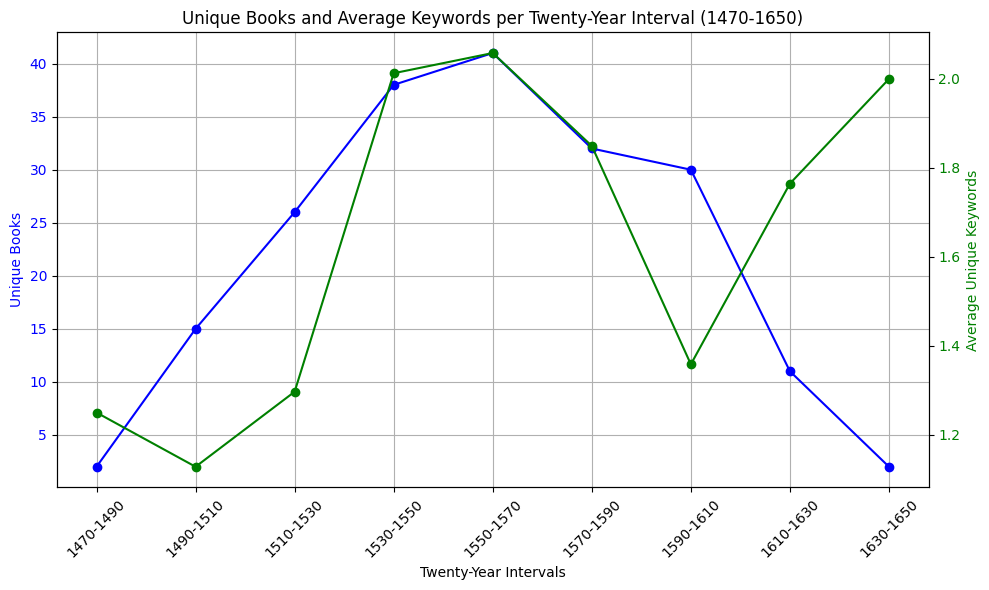

In [10]:
# Convert the year to an integer (if it's not already)
being_in_a_sign['year'] = being_in_a_sign['year'].astype(int)

# Create twenty-year intervals
bins = list(range(1470, 1660, 20))
labels = [f"{i}-{i + 20}" for i in bins[:-1]]
being_in_a_sign['interval'] = pd.cut(being_in_a_sign['year'], bins=bins, labels=labels, right=False)

# Count unique books per interval
unique_books = being_in_a_sign.groupby('interval')['book'].nunique()

# Calculate unique keywords per book
being_in_a_sign['num_keywords'] = being_in_a_sign['cks'].apply(lambda x: len(set(x.split(','))))
avg_keywords = being_in_a_sign.groupby('interval').agg({'num_keywords': 'mean'})

# Combine results into a single DataFrame for plotting
result = pd.DataFrame({
    'Unique Books': unique_books,
    'Avg Unique Keywords': avg_keywords['num_keywords']
})

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Unique Books on primary y-axis
ax1.plot(result.index, result['Unique Books'], marker='o', label='Unique Books', color='b')
ax1.set_xlabel('Twenty-Year Intervals')
ax1.set_ylabel('Unique Books', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create secondary y-axis for Avg Unique Keywords
ax2 = ax1.twinx()
ax2.plot(result.index, result['Avg Unique Keywords'], marker='o', label='Average Unique Keywords', color='g')
ax2.set_ylabel('Average Unique Keywords', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Title and layout
plt.title('Unique Books and Average Keywords per Twenty-Year Interval (1470-1650)')
ax1.set_xticks(result.index)
ax1.set_xticklabels(result.index, rotation=45)
ax1.grid()
fig.tight_layout()
plt.show()

In [49]:
# Split the "cks" column and flatten the lists
all_keywords = being_in_a_sign['cks'].str.split(', ').explode()

# Get unique keywords
unique_keywords = all_keywords.unique()

# Count unique keywords
unique_count = len(unique_keywords)

# Display the unique keywords and their count
print("Unique Keywords:", unique_keywords)
print("Count of Unique Keywords:", unique_count)

Unique Keywords: ['CK_Pyramid of a Sign' 'CK_Sphere Sliced by the Signs' 'CK_Sun in Sign'
 'CK_Sign as Spherical Wedge' 'CK_Rectangular Shape of the Sign'
 'CK_Armillary Sphere' 'CK_Zodiac']
Count of Unique Keywords: 7


C:\Users\nogas\AppData\Local\Temp\ipykernel_21204\1302798350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  being_in_a_sign['year'] = pd.to_numeric(being_in_a_sign['year'], errors='coerce')
C:\Users\nogas\AppData\Local\Temp\ipykernel_21204\1302798350.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_books_being_in_a_sign = being_in_a_sign.groupby('interval')['book'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_21204\1302798350.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True i

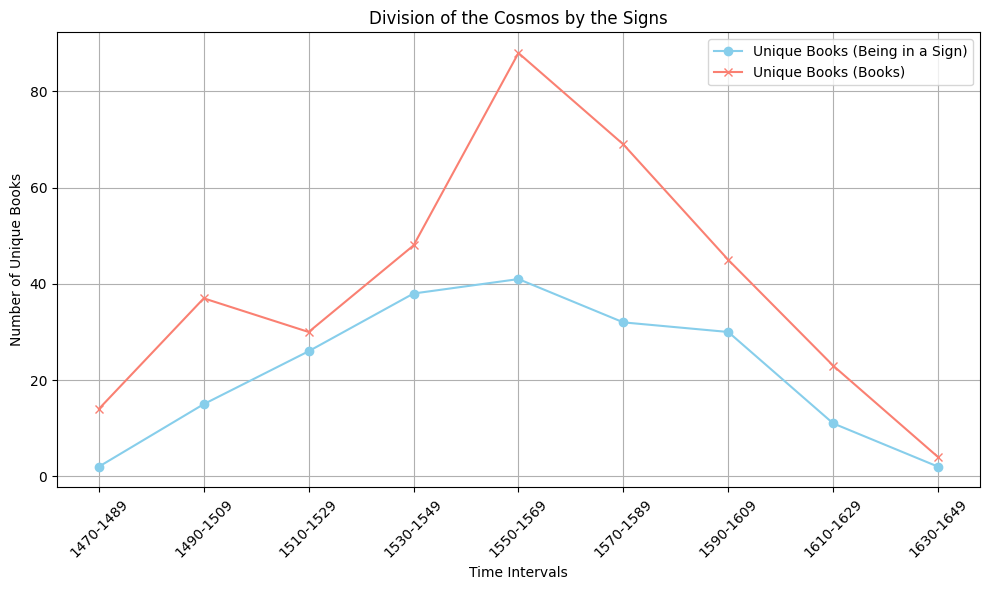

In [50]:
# Step 1: Convert the 'year' column to numeric, if it's not already
being_in_a_sign['year'] = pd.to_numeric(being_in_a_sign['year'], errors='coerce')

# Step 2: Drop any rows with NaN values in 'year'
being_in_a_sign = being_in_a_sign.dropna(subset=['year'])

# Step 3: Create a new column for twenty-year intervals in being_in_a_sign
bins = range(1470, 1670, 20)
labels = [f"{i}-{i + 19}" for i in bins[:-1]]
being_in_a_sign['interval'] = pd.cut(being_in_a_sign['year'], bins=bins, labels=labels, right=False)

# Step 4: Count unique books in each interval for being_in_a_sign
unique_books_being_in_a_sign = being_in_a_sign.groupby('interval')['book'].nunique().reset_index()
unique_books_being_in_a_sign.rename(columns={'book': 'unique_books_being_in_a_sign'}, inplace=True)

# Step 5: Calculate unique book counts for the "books" DataFrame
# Assuming "books" DataFrame has a "year" column as well
books['year'] = pd.to_numeric(books['year'], errors='coerce')  # Convert year to numeric
books = books.dropna(subset=['year'])  # Drop NaN years

# Create intervals for the books DataFrame
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Count unique books in each interval for books DataFrame
unique_books_books = books.groupby('interval')['book'].nunique().reset_index()
unique_books_books.rename(columns={'book': 'unique_books_books'}, inplace=True)

# Step 6: Merge the two DataFrames on the interval
merged_unique_books = unique_books_being_in_a_sign.merge(unique_books_books, on='interval')

# Step 7: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(merged_unique_books['interval'], merged_unique_books['unique_books_being_in_a_sign'], marker='o', label='Unique Books (Being in a Sign)', color='skyblue')
plt.plot(merged_unique_books['interval'], merged_unique_books['unique_books_books'], marker='x', label='Unique Books (Books)', color='salmon')
plt.xlabel('Time Intervals')
plt.ylabel('Number of Unique Books')
plt.title('Division of the Cosmos by the Signs')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_21204\321329100.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_count = keyword_df.groupby('interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_21204\321329100.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_count = keyword_df.groupby('interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_21204\321329100.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain c

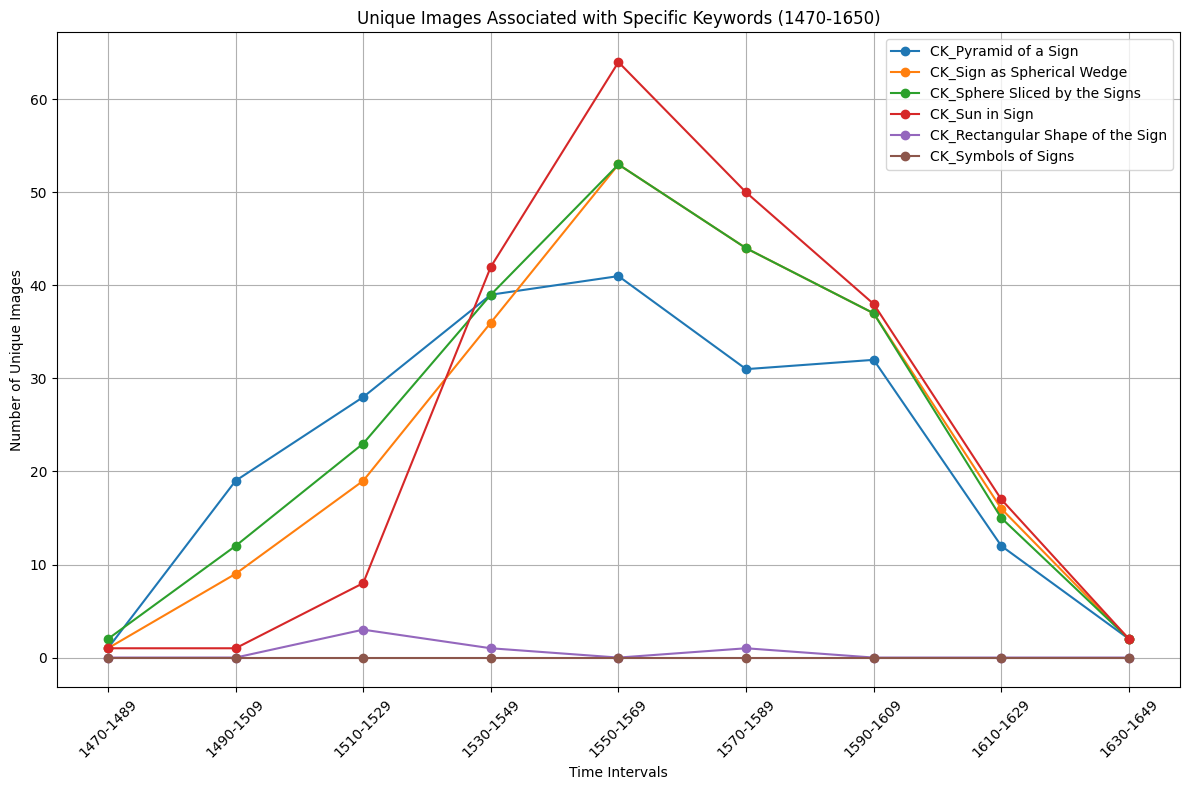

In [51]:
# Step 1: Convert the 'year' column to numeric, if it's not already
being_in_a_sign['year'] = pd.to_numeric(being_in_a_sign['year'], errors='coerce')
being_in_a_sign = being_in_a_sign.dropna(subset=['year', 'cks'])

# Step 2: Create a new column for twenty-year intervals
bins = range(1470, 1670, 20)
labels = [f"{i}-{i + 19}" for i in bins[:-1]]
being_in_a_sign['interval'] = pd.cut(being_in_a_sign['year'], bins=bins, labels=labels, right=False)

# Step 3: Define the keywords to filter
keywords = [
    'CK_Pyramid of a Sign', 
    'CK_Sign as Spherical Wedge', 
    'CK_Sphere Sliced by the Signs', 
    'CK_Sun in Sign', 
    'CK_Rectangular Shape of the Sign', 
    'CK_Symbols of Signs'
]

# Step 4: Initialize a DataFrame to store unique image counts
image_counts = pd.DataFrame()

# Step 5: Count unique images for each keyword in the specified intervals
for keyword in keywords:
    keyword_df = being_in_a_sign[being_in_a_sign['cks'].str.contains(keyword)]
    unique_images_count = keyword_df.groupby('interval')['images'].nunique().reset_index()
    unique_images_count.rename(columns={'images': f'unique_images_{keyword}'}, inplace=True)
    
    # Merge into the main DataFrame
    if image_counts.empty:
        image_counts = unique_images_count
    else:
        image_counts = image_counts.merge(unique_images_count, on='interval', how='outer')

# Step 6: Plot the results
plt.figure(figsize=(12, 8))

# Create a plot for each keyword
for keyword in keywords:
    plt.plot(image_counts['interval'], image_counts[f'unique_images_{keyword}'], marker='o', label=keyword)

plt.xlabel('Time Intervals')
plt.ylabel('Number of Unique Images')
plt.title('Unique Images Associated with Specific Keywords (1470-1650)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


C:\Users\nogas\AppData\Local\Temp\ipykernel_21204\2400384898.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_count = keyword_df.groupby('interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_21204\2400384898.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_count = keyword_df.groupby('interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_21204\2400384898.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retai

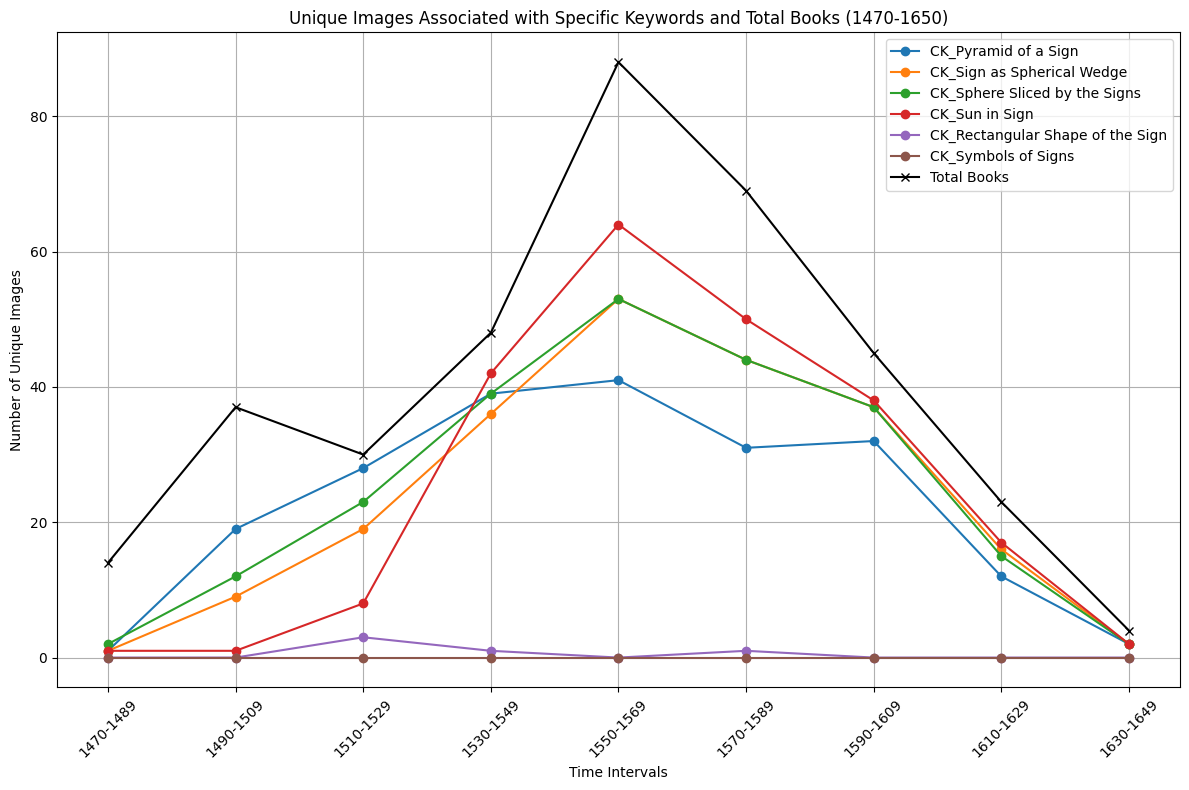

In [52]:
# Step 1: Convert the 'year' column to numeric in being_in_a_sign, if it's not already
being_in_a_sign['year'] = pd.to_numeric(being_in_a_sign['year'], errors='coerce')
being_in_a_sign = being_in_a_sign.dropna(subset=['year', 'cks'])

# Step 2: Create a new column for twenty-year intervals in being_in_a_sign
bins = range(1470, 1670, 20)
labels = [f"{i}-{i + 19}" for i in bins[:-1]]
being_in_a_sign['interval'] = pd.cut(being_in_a_sign['year'], bins=bins, labels=labels, right=False)

# Step 3: Define the keywords to filter
keywords = [
    'CK_Pyramid of a Sign', 
    'CK_Sign as Spherical Wedge', 
    'CK_Sphere Sliced by the Signs', 
    'CK_Sun in Sign', 
    'CK_Rectangular Shape of the Sign', 
    'CK_Symbols of Signs'
]

# Step 4: Initialize a DataFrame to store unique image counts
image_counts = pd.DataFrame()

# Step 5: Count unique images for each keyword in the specified intervals
for keyword in keywords:
    keyword_df = being_in_a_sign[being_in_a_sign['cks'].str.contains(keyword)]
    unique_images_count = keyword_df.groupby('interval')['images'].nunique().reset_index()
    unique_images_count.rename(columns={'images': f'unique_images_{keyword}'}, inplace=True)
    
    # Merge into the main DataFrame
    if image_counts.empty:
        image_counts = unique_images_count
    else:
        image_counts = image_counts.merge(unique_images_count, on='interval', how='outer')

# Step 6: Count total unique books from the books DataFrame for the same intervals
# Assuming 'books' DataFrame has a 'year' column for intervals
books['year'] = pd.to_numeric(books['year'], errors='coerce')
books = books.dropna(subset=['year'])
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Count unique books per interval
total_books_per_interval = books.groupby('interval')['book'].nunique().reset_index()
total_books_per_interval.rename(columns={'book': 'total_books'}, inplace=True)

# Step 7: Merge the total books count into the image_counts DataFrame
image_counts = image_counts.merge(total_books_per_interval, on='interval', how='outer')

# Step 8: Plot the results
plt.figure(figsize=(12, 8))

# Create a plot for each keyword
for keyword in keywords:
    plt.plot(image_counts['interval'], image_counts[f'unique_images_{keyword}'], marker='o', label=keyword)

# Plot total number of books
plt.plot(image_counts['interval'], image_counts['total_books'], marker='x', color='black', label='Total Books')

plt.xlabel('Time Intervals')
plt.ylabel('Number of Unique Images')
plt.title('Unique Images Associated with Specific Keywords and Total Books (1470-1650)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_21204\1360214112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  being_in_a_sign['year'] = pd.to_numeric(being_in_a_sign['year'], errors='coerce')
C:\Users\nogas\AppData\Local\Temp\ipykernel_21204\1360214112.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_keywords_count = exploded_df.groupby(['interval', 'book'])['cks'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_21204\1360214112.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in 

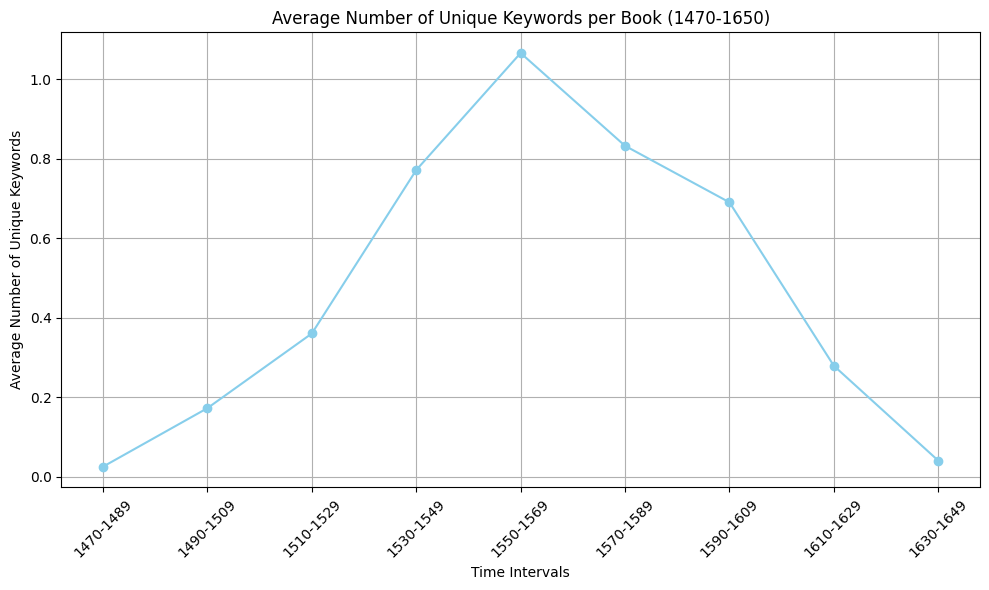

In [28]:
# Step 1: Convert the 'year' column to numeric, if it's not already
being_in_a_sign['year'] = pd.to_numeric(being_in_a_sign['year'], errors='coerce')

# Step 2: Drop any rows with NaN values in 'year' or 'cks'
being_in_a_sign = being_in_a_sign.dropna(subset=['year', 'cks'])

# Step 3: Explode the DataFrame to get each keyword in its own row
exploded_df = being_in_a_sign.explode('cks')

# Step 4: Create a new column for twenty-year intervals in the exploded DataFrame
bins = range(1470, 1670, 20)
labels = [f"{i}-{i + 19}" for i in bins[:-1]]
exploded_df['interval'] = pd.cut(exploded_df['year'], bins=bins, labels=labels, right=False)

# Step 5: Group by interval and book, then count unique keywords
unique_keywords_count = exploded_df.groupby(['interval', 'book'])['cks'].nunique().reset_index()

# Step 6: Calculate the average number of unique keywords per book in each interval
average_keywords_per_interval = unique_keywords_count.groupby('interval')['cks'].mean().reset_index()

# Step 7: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(average_keywords_per_interval['interval'], average_keywords_per_interval['cks'], marker='o', color='skyblue')
plt.xlabel('Time Intervals')
plt.ylabel('Average Number of Unique Keywords')
plt.title('Average Number of Unique Keywords per Book (1470-1650)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_21204\1264226010.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_keywords_count = exploded_df.groupby(['interval', 'book'])['cks'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_21204\1264226010.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_keywords_per_interval = unique_keywords_count.groupby('interval')['cks'].mean().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_21204\1264226010.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pas

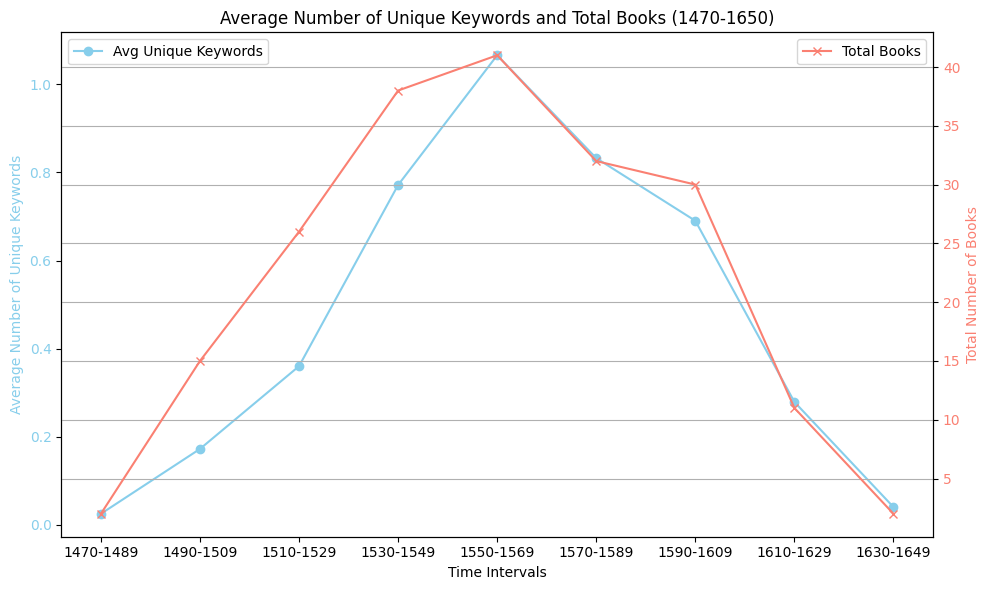

In [29]:
# Assuming being_in_a_sign is already defined and contains the relevant columns

# Step 1: Convert the 'year' column to numeric, if it's not already
being_in_a_sign['year'] = pd.to_numeric(being_in_a_sign['year'], errors='coerce')

# Step 2: Drop any rows with NaN values in 'year' or 'cks'
being_in_a_sign = being_in_a_sign.dropna(subset=['year', 'cks'])

# Step 3: Explode the DataFrame to get each keyword in its own row
exploded_df = being_in_a_sign.explode('cks')

# Step 4: Create a new column for twenty-year intervals in the exploded DataFrame
bins = range(1470, 1670, 20)
labels = [f"{i}-{i + 19}" for i in bins[:-1]]
exploded_df['interval'] = pd.cut(exploded_df['year'], bins=bins, labels=labels, right=False)

# Step 5: Group by interval and book, then count unique keywords
unique_keywords_count = exploded_df.groupby(['interval', 'book'])['cks'].nunique().reset_index()

# Step 6: Calculate the average number of unique keywords per book in each interval
average_keywords_per_interval = unique_keywords_count.groupby('interval')['cks'].mean().reset_index()

# Step 7: Count the total number of books in each interval
total_books_per_interval = exploded_df.groupby('interval')['book'].nunique().reset_index()
total_books_per_interval.rename(columns={'book': 'total_books'}, inplace=True)

# Step 8: Merge the two dataframes on the interval
merged_df = average_keywords_per_interval.merge(total_books_per_interval, on='interval')

# Step 9: Plot the results with a secondary y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot average number of unique keywords
ax1.plot(merged_df['interval'], merged_df['cks'], marker='o', color='skyblue', label='Avg Unique Keywords')
ax1.set_xlabel('Time Intervals')
ax1.set_ylabel('Average Number of Unique Keywords', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a second y-axis for the total number of books
ax2 = ax1.twinx()
ax2.plot(merged_df['interval'], merged_df['total_books'], marker='x', color='salmon', label='Total Books')
ax2.set_ylabel('Total Number of Books', color='salmon')
ax2.tick_params(axis='y', labelcolor='salmon')

# Title and legend
plt.title('Average Number of Unique Keywords and Total Books (1470-1650)')
fig.tight_layout()
plt.grid()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

In [7]:
# Count unique book values
unique_book_count = being_in_a_sign['book'].nunique()

# Display the count
print("Count of Unique Book Values:", unique_book_count)

Count of Unique Book Values: 197


In [8]:
# Define the list of keywords again
keywords = [
    'CK_Pyramid of a Sign', 
    'CK_Sign as Spherical Wedge', 
    'CK_Sphere Sliced by the Signs', 
    'CK_Sun in Sign', 
    'CK_Rectangular Shape of the Sign', 
 #   'CK_Zodiac', 
    'CK_Symbols of Signs'
]

# Create a set for faster lookup
keywords_set = set(keywords)

# Function to filter keywords in the "cks" column
def filter_keywords(cks):
    # Split the string into a list of keywords
    keyword_list = [k.strip() for k in cks.split(',')]
    # Retain only those in the keywords_set
    filtered_list = [k for k in keyword_list if k in keywords_set]
    # Join back into a string
    return ', '.join(filtered_list)

# Apply the function to the "cks" column
being_in_a_sign['cks'] = being_in_a_sign['cks'].apply(filter_keywords)

being_in_a_sign

C:\Users\nogas\AppData\Local\Temp\ipykernel_21204\1783094074.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  being_in_a_sign['cks'] = being_in_a_sign['cks'].apply(filter_keywords)


,images,cluster_name,cks,book,bid,part_or_adaption,part_or_adaption_label,type_label,custom_identifier,place,year,flag
44,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00142,"CK_Pyramid of a Sign, CK_Sign as Spherical Wedge",http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...,1924,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Annotated, Content",322,Venice,1488,nan
59,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01310,CK_Sphere Sliced by the Signs,http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...,1924,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Annotated, Content",322,Venice,1488,nan
209,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00191,CK_Pyramid of a Sign,http://sphaera.mpiwg-berlin.mpg.de/id/item/b8e...,1622,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Tractatus de sphaera,"Content, Annotated",329,Venice,1494,nan
210,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01063,CK_Sign as Spherical Wedge,http://sphaera.mpiwg-berlin.mpg.de/id/item/b8e...,1622,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Tractatus de sphaera,"Content, Annotated",329,Venice,1494,nan
249,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01310,CK_Sphere Sliced by the Signs,http://sphaera.mpiwg-berlin.mpg.de/id/item/b8e...,1622,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Tractatus de sphaera,"Annotated, Content",329,Venice,1494,nan
...,...,...,...,...,...,...,...,...,...,...,...,...
20534,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00555,"CK_Sign as Spherical Wedge, CK_Sphere Sliced b...",http://sphaera.mpiwg-berlin.mpg.de/id/item/cc6...,1962,http://sphaera.mpiwg-berlin.mpg.de/id/part/47c...,Compendium by P. Valeriano,"Original Part, Content",251,Paris,1619,nan
20693,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_03345,"CK_Pyramid of a Sign, CK_Sign as Spherical Wed...",http://sphaera.mpiwg-berlin.mpg.de/id/item/fcd...,2265,http://sphaera.mpiwg-berlin.mpg.de/id/part/a22...,Introduction to Astronomy by Nunes,"Original Part, Content",777,Sine loco,1521,nan
20825,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_03623,"CK_Pyramid of a Sign, CK_Sign as Spherical Wed...",http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...,2279,http://sphaera.mpiwg-berlin.mpg.de/id/part/acd...,Second part of the Sphere treatise of Thomas Hill,"Content, Original Part",929,London,1599,nan
20826,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_03529,CK_Sign as Spherical Wedge,http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...,2279,http://sphaera.mpiwg-berlin.mpg.de/id/part/acd...,Second part of the Sphere treatise of Thomas Hill,"Content, Original Part",929,London,1599,nan


In [10]:
# Split the "cks" column and flatten the lists
all_keywords = being_in_a_sign['cks'].str.split(', ').explode()

# Get unique keywords
unique_keywords = all_keywords.unique()

# Count unique keywords
unique_count = len(unique_keywords)

# Display the unique keywords and their count
print("Unique Keywords:", unique_keywords)
print("Count of Unique Keywords:", unique_count)

Unique Keywords: ['CK_Pyramid of a Sign' 'CK_Sign as Spherical Wedge'
 'CK_Sphere Sliced by the Signs' 'CK_Sun in Sign'
 'CK_Rectangular Shape of the Sign']
Count of Unique Keywords: 5


In [11]:
# Assuming your DataFrame has a 'book' column for book values and a 'year' column
# Group by 'book' and 'year', and count unique keywords in 'cks'
summary_df = being_in_a_sign.groupby(['book', 'year'])['cks'].nunique().reset_index()

# Rename the columns
summary_df.columns = ['Book', 'Year', 'Unique_Keyword_Count']

summary_df

,Book,Year,Unique_Keyword_Count
0,http://sphaera.mpiwg-berlin.mpg.de/id/item/002...,1594,4
1,http://sphaera.mpiwg-berlin.mpg.de/id/item/008...,1533,1
2,http://sphaera.mpiwg-berlin.mpg.de/id/item/012...,1568,2
3,http://sphaera.mpiwg-berlin.mpg.de/id/item/012...,1606,4
4,http://sphaera.mpiwg-berlin.mpg.de/id/item/01f...,1561,4
...,...,...,...
192,http://sphaera.mpiwg-berlin.mpg.de/id/item/fa1...,1577,4
193,http://sphaera.mpiwg-berlin.mpg.de/id/item/fc2...,1521,2
194,http://sphaera.mpiwg-berlin.mpg.de/id/item/fcd...,1521,1
195,http://sphaera.mpiwg-berlin.mpg.de/id/item/fe1...,1532,4


C:\Users\nogas\AppData\Local\Temp\ipykernel_21204\4130600577.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interval_summary = summary_df.groupby('Year_Interval')['Unique_Keyword_Count'].mean().reset_index()


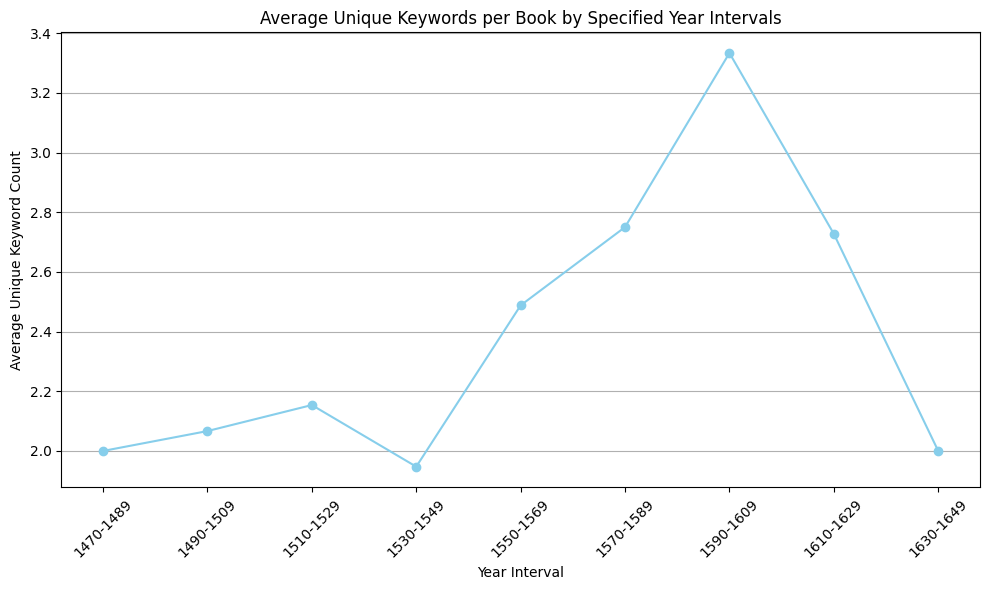

In [12]:
# Ensure 'Year' is numeric
summary_df['Year'] = pd.to_numeric(summary_df['Year'], errors='coerce')

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Create a new column for year intervals using pd.cut()
summary_df['Year_Interval'] = pd.cut(summary_df['Year'], bins=bins, labels=labels, right=False)

# Group by the Year_Interval and calculate the average of Unique_Keyword_Count
interval_summary = summary_df.groupby('Year_Interval')['Unique_Keyword_Count'].mean().reset_index()

# Plotting as a line graph
plt.figure(figsize=(10, 6))
plt.plot(interval_summary['Year_Interval'].astype(str), interval_summary['Unique_Keyword_Count'], marker='o', color='skyblue')
plt.xlabel('Year Interval')
plt.ylabel('Average Unique Keyword Count')
plt.title('Average Unique Keywords per Book by Specified Year Intervals')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_21204\3688797515.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  book_interval_summary = books.groupby('Year_Interval')['book'].nunique().reset_index()


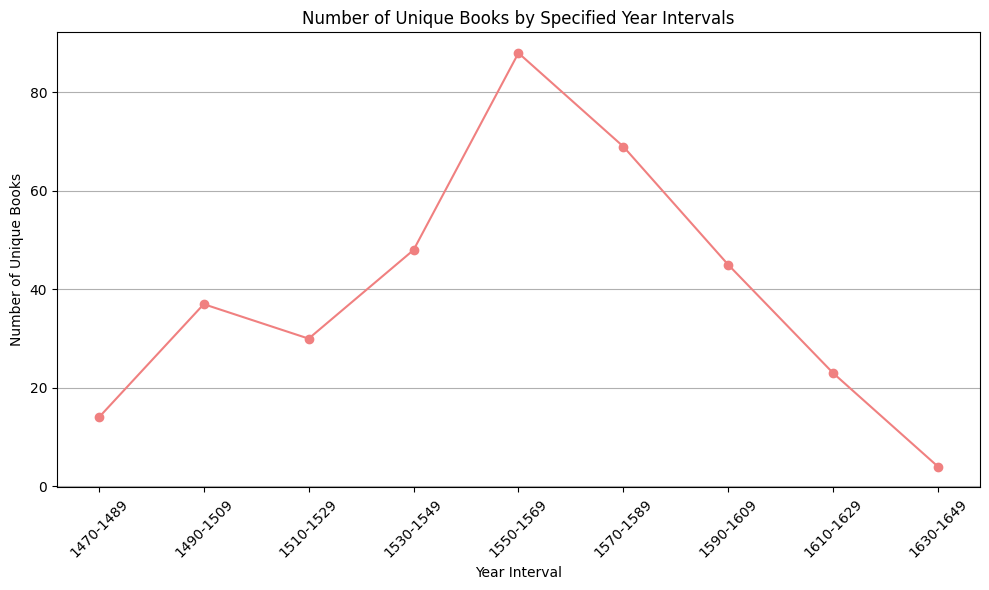

In [13]:


# Assuming books_df is your DataFrame containing book data
# Ensure 'Year' is numeric
books['year'] = pd.to_numeric(books['year'], errors='coerce')

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Create a new column for year intervals using pd.cut()
books['Year_Interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Group by the Year_Interval and count unique book values
book_interval_summary = books.groupby('Year_Interval')['book'].nunique().reset_index()

# Plotting as a line graph
plt.figure(figsize=(10, 6))
plt.plot(book_interval_summary['Year_Interval'].astype(str), book_interval_summary['book'], marker='o', color='lightcoral')
plt.xlabel('Year Interval')
plt.ylabel('Number of Unique Books')
plt.title('Number of Unique Books by Specified Year Intervals')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_21204\325619897.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  book_interval_summary = books.groupby('Year_Interval')['book'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_21204\325619897.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interval_summary = summary_df.groupby('Year_Interval')['Unique_Keyword_Count'].mean().reset_index()


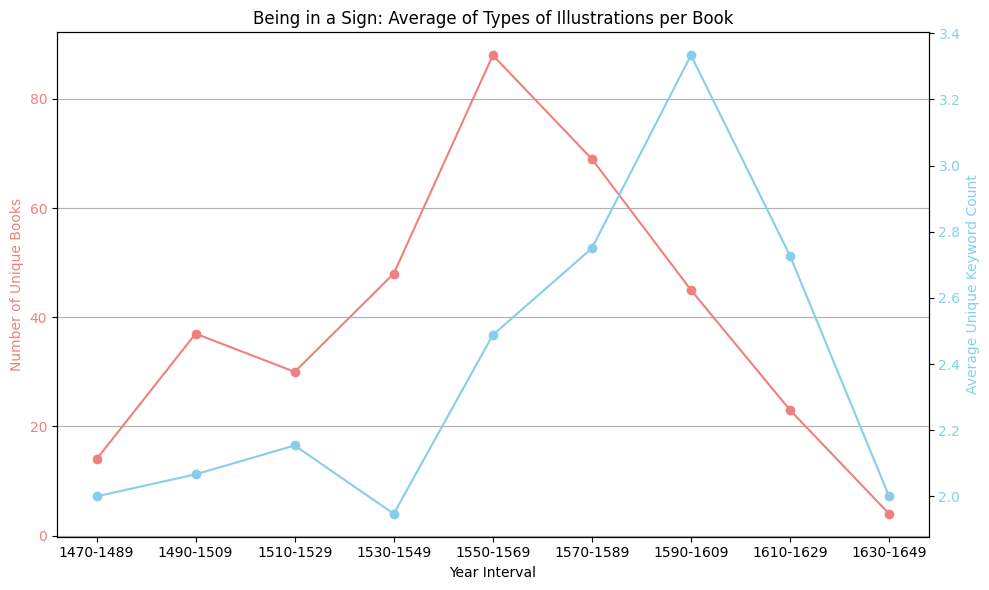

In [14]:
# Ensure 'Year' is numeric for books_df
books['year'] = pd.to_numeric(books['year'], errors='coerce')

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Create a new column for year intervals using pd.cut() in books_df
books['Year_Interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Group by the Year_Interval and count unique book values
book_interval_summary = books.groupby('Year_Interval')['book'].nunique().reset_index()

# Ensure 'Year' is numeric for summary_df
summary_df['Year'] = pd.to_numeric(summary_df['Year'], errors='coerce')

# Create a new column for year intervals using pd.cut() in summary_df
summary_df['Year_Interval'] = pd.cut(summary_df['Year'], bins=bins, labels=labels, right=False)

# Group by the Year_Interval and calculate the average of Unique_Keyword_Count
interval_summary = summary_df.groupby('Year_Interval')['Unique_Keyword_Count'].mean().reset_index()

# Creating a combined plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# First plot for unique books
ax1.plot(book_interval_summary['Year_Interval'].astype(str), book_interval_summary['book'], marker='o', color='lightcoral', label='Unique Books')
ax1.set_xlabel('Year Interval')
ax1.set_ylabel('Number of Unique Books', color='lightcoral')
ax1.tick_params(axis='y', labelcolor='lightcoral')
ax1.grid(axis='y')

# Create a second y-axis for average unique keyword count
ax2 = ax1.twinx()
ax2.plot(interval_summary['Year_Interval'].astype(str), interval_summary['Unique_Keyword_Count'], marker='o', color='skyblue', label='Average Unique Keywords')
ax2.set_ylabel('Average Unique Keyword Count', color='skyblue')
ax2.tick_params(axis='y', labelcolor='skyblue')

# Title and layout adjustments
plt.title('Being in a Sign: Average of Types of Illustrations per Book')
fig.tight_layout()
plt.show()


C:\Users\nogas\AppData\Local\Temp\ipykernel_21204\4057402210.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  book_interval_summary = books.groupby('Year_Interval')['book'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_21204\4057402210.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interval_summary = summary_df.groupby('Year_Interval')['Unique_Keyword_Count'].mean().reset_index()


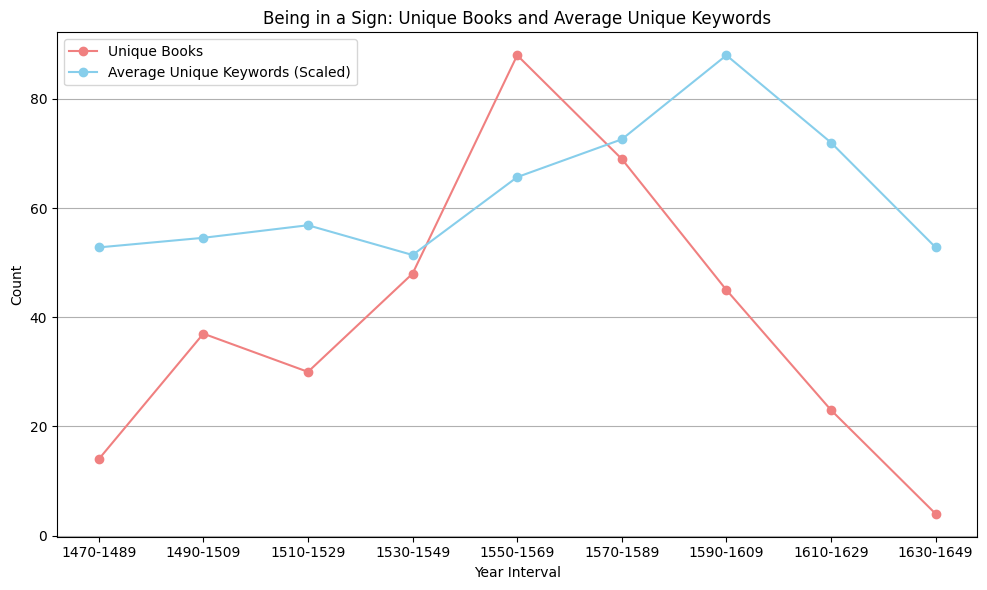

In [15]:
# Ensure 'Year' is numeric for books_df
books['year'] = pd.to_numeric(books['year'], errors='coerce')

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Create a new column for year intervals using pd.cut() in books_df
books['Year_Interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Group by the Year_Interval and count unique book values
book_interval_summary = books.groupby('Year_Interval')['book'].nunique().reset_index()

# Ensure 'Year' is numeric for summary_df
summary_df['Year'] = pd.to_numeric(summary_df['Year'], errors='coerce')

# Create a new column for year intervals using pd.cut() in summary_df
summary_df['Year_Interval'] = pd.cut(summary_df['Year'], bins=bins, labels=labels, right=False)

# Group by the Year_Interval and calculate the average of Unique_Keyword_Count
interval_summary = summary_df.groupby('Year_Interval')['Unique_Keyword_Count'].mean().reset_index()

# Create a combined plot with a single y-axis
fig, ax = plt.subplots(figsize=(10, 6))

# Normalize the average unique keyword count for better visual comparison
scaled_avg_keywords = interval_summary['Unique_Keyword_Count'] * (book_interval_summary['book'].max() / interval_summary['Unique_Keyword_Count'].max())

# First plot for unique books
ax.plot(book_interval_summary['Year_Interval'].astype(str), book_interval_summary['book'], marker='o', color='lightcoral', label='Unique Books')
# Plot the scaled average unique keywords
ax.plot(interval_summary['Year_Interval'].astype(str), scaled_avg_keywords, marker='o', color='skyblue', label='Average Unique Keywords (Scaled)')

# Set labels and title
ax.set_xlabel('Year Interval')
ax.set_ylabel('Count', color='black')
ax.tick_params(axis='y', labelcolor='black')
ax.grid(axis='y')
plt.title('Being in a Sign: Unique Books and Average Unique Keywords')

# Add a legend
ax.legend()

# Layout adjustments
fig.tight_layout()
plt.show()